<a href="https://colab.research.google.com/github/simsekergun/RingDimensionDS/blob/main/SM_Prediction_Dint_Only_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> 200 MHz Noise Added Datasets </b> <br>
The goal of this project is to predict the Sellmeier Model from the integrated dispersion datasets. The datasets can be found at https://github.com/simsekergun/RingDimensionDS/. In all datasets, the first two column are the dimensions and the following columns are the integrated dispersion values computed at 171 wavelengths ranging from 750 nm to 1600 nm.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

Let's get our datasets

In [ ]:
XY_train1 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtrainingDint1SM1_200.csv', header=None)
XY_train1['SM'] = 1
XY_test1 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtestDint1SM1_200.csv', header=None)
XY_test1['SM'] = 1
XY_train2 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtrainingDint1SM2_200.csv', header=None)
XY_train2['SM'] = 2
XY_test2 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtestDint1SM2_200.csv', header=None)
XY_test2['SM'] = 2
XY_train3 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtrainingDint1SM3_200.csv', header=None)
XY_train3['SM'] = 3
XY_test3 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtestDint1SM3_200.csv', header=None)
XY_test3['SM'] = 3
XY_train4 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtrainingDint1SM4_200.csv', header=None)
XY_train4['SM'] = 4
XY_test4 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingDimensionDS/refs/heads/main/datasets/SiNtestDint1SM4_200.csv', header=None)
XY_test4['SM'] = 4

In [ ]:
# Merge all training datasets vertically
XY_train_combined = pd.concat([XY_train1, XY_train2, XY_train3, XY_train4], axis=0)
# Reset index
XY_train_combined.reset_index(drop=True, inplace=True)
# Verify the shape
print(f"Combined dataset shape: {XY_train_combined.shape}")  # Should be (1764, 173)

Combined dataset shape: (1764, 174)


In [ ]:
XY_train_combined.head(3)

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,SM
0,7.500000e-07,6.200000e-07,-1603.5,-1399.7,-1073.1,-858.06,-610.22,-467.27,-236.88,-152.550,...,-13074.0,-13621.0,-14040.0,-14603.0,-15083.0,-15410.0,-16002.0,-16562.0,-16921.0,1
1,7.600000e-07,6.200000e-07,-1615.8,-1324.4,-1153.8,-764.39,-657.23,-533.52,-313.28,-49.135,...,-11752.0,-12243.0,-12533.0,-13123.0,-13456.0,-14012.0,-14299.0,-14903.0,-15370.0,1
2,7.700000e-07,6.200000e-07,-1781.2,-1343.5,-1172.9,-923.60,-756.06,-580.88,-385.48,-98.266,...,-10512.0,-10884.0,-11350.0,-11585.0,-12182.0,-12556.0,-12842.0,-13368.0,-13752.0,1


In [ ]:
# Merge all test datasets vertically
XY_test_combined = pd.concat([XY_test1, XY_test2, XY_test3, XY_test4], axis=0)

# Reset index
XY_test_combined.reset_index(drop=True, inplace=True)

# Verify the shape
print(f"Combined test dataset shape: {XY_test_combined.shape}")

Combined test dataset shape: (176, 174)


In [ ]:
xmax = 40000.0


X_train = XY_train_combined.iloc[:,np.arange(2,173)].copy()
X_test = XY_test_combined.iloc[:,np.arange(2,173)].copy()
X_train = X_train/xmax
X_test = X_test/xmax

Y_train = XY_train_combined.iloc[:,173]
Y_test = XY_test_combined.iloc[:,173]


In [ ]:
X_train.head(4)

,2,3,4,5,6,7,8,9,10,11,...,163,164,165,166,167,168,169,170,171,172
0,-0.040087,-0.034993,-0.026827,-0.021451,-0.015255,-0.011682,-0.005922,-0.003814,-0.000754,0.004094,...,-0.319300,-0.32685,-0.340525,-0.351000,-0.365075,-0.377075,-0.385250,-0.400050,-0.414050,-0.423025
1,-0.040395,-0.033110,-0.028845,-0.019110,-0.016431,-0.013338,-0.007832,-0.001228,0.002950,0.004808,...,-0.285600,-0.29380,-0.306075,-0.313325,-0.328075,-0.336400,-0.350300,-0.357475,-0.372575,-0.384250
2,-0.044530,-0.033587,-0.029323,-0.023090,-0.018901,-0.014522,-0.009637,-0.002457,-0.002015,0.003397,...,-0.250600,-0.26280,-0.272100,-0.283750,-0.289625,-0.304550,-0.313900,-0.321050,-0.334200,-0.343800
3,-0.046347,-0.036602,-0.029543,-0.025555,-0.020725,-0.014338,-0.007004,-0.006182,0.000648,0.001268,...,-0.225575,-0.23126,-0.239510,-0.251475,-0.258500,-0.269550,-0.277275,-0.290750,-0.298900,-0.309125


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1764, 173) (1764,) (176, 173) (176,)


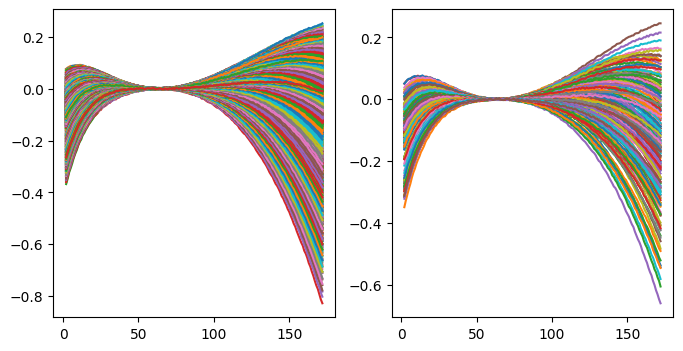

In [ ]:
# Let's visaulize our scaled dataset
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(X_train.T)

plt.subplot(1, 2, 2)
plt.plot(X_test.T)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Prepare the data
print("Original shapes:")
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Convert labels to one-hot encoding (since we have 4 classes)
Y_train_onehot = to_categorical(Y_train - 1, num_classes=4)  # Convert 1-4 to 0-3
Y_test_onehot = to_categorical(Y_test - 1, num_classes=4)

# Separate the first two columns (dimensions) from the rest
#X_train_dims = X_train.iloc[:, :2].values
#X_train_disp = X_train.iloc[:, 2:].values
#X_test_dims = X_test.iloc[:, :2].values
#X_test_disp = X_test.iloc[:, 2:].values

# Normalize the dispersion values (already normalized by 10, but standardize)
#scaler_disp = StandardScaler()
#X_train_disp_scaled = scaler_disp.fit_transform(X_train_disp)
#X_test_disp_scaled = scaler_disp.transform(X_test_disp)

# Combine back the features
#X_train_final = np.hstack([X_train_dims, X_train_disp_scaled])
#X_test_final = np.hstack([X_test_dims, X_test_disp_scaled])

# 2. Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(171,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(4, activation='softmax')  # 4 output classes
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, Y_train_onehot,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, Y_test_onehot),
                    verbose=1)

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test_onehot, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# 6. Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Convert back to 1-4 labels

# Print some examples
print("\nSample predictions:")
for i in range(10):
    print(f"True: {Y_test.iloc[i]}, Predicted: {y_pred_classes[i]}, Probabilities: {np.round(y_pred[i], 2)}")

Original shapes:
X_train: (1764, 171), Y_train: (1764,)
X_test: (176, 171), Y_test: (176,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5045 - loss: 1.3071 - val_accuracy: 0.4886 - val_loss: 1.2080
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5692 - loss: 0.9457 - val_accuracy: 0.3523 - val_loss: 1.2522
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6038 - loss: 0.8700 - val_accuracy: 0.3409 - val_loss: 1.2951
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6277 - loss: 0.8039 - val_accuracy: 0.4659 - val_loss: 1.1140
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6262 - loss: 0.7652 - val_accuracy: 0.5057 - val_loss: 1.0078
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6313 - loss: 0.7378 - val_accuracy: 0.5398 - val_loss: 0.8865
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.7261 - val_accuracy: 0.5398 - val_loss: 0.8446
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6393 - loss: 0.7440 - val_accuracy: 0.5852 - val_loss: 0.7947
Epo

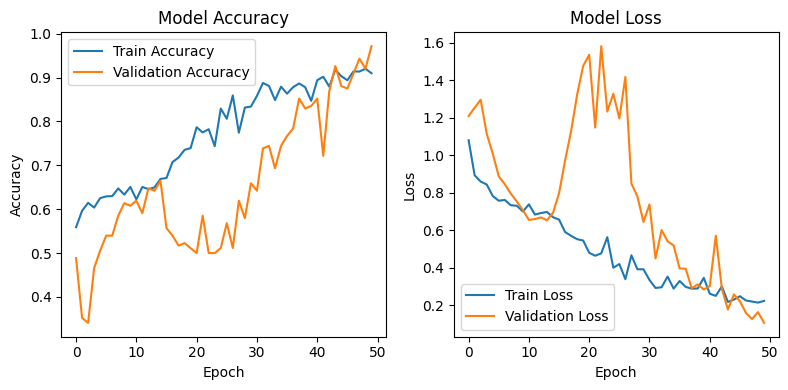


Model Performance Summary:
+------------+-----------+------------+
| Dataset    |   Samples |   Accuracy |
+============+===========+============+
| Training   |      1764 |     0.9099 |
+------------+-----------+------------+
| Validation |       176 |     0.9716 |
+------------+-----------+------------+

Class-wise Performance Metrics:
+---------+-------------+----------+------------+-----------+
| Class   |   Precision |   Recall |   F1-Score |   Samples |
+=========+=============+==========+============+===========+
| Model 1 |      0.9149 |   0.9773 |     0.9451 |   44.0000 |
+---------+-------------+----------+------------+-----------+
| Model 2 |      0.9756 |   0.9091 |     0.9412 |   44.0000 |
+---------+-------------+----------+------------+-----------+
| Model 3 |      1.0000 |   1.0000 |     1.0000 |   44.0000 |
+---------+-------------+----------+------------+-----------+
| Model 4 |      1.0000 |   1.0000 |     1.0000 |   44.0000 |
+---------+-------------+----------+---

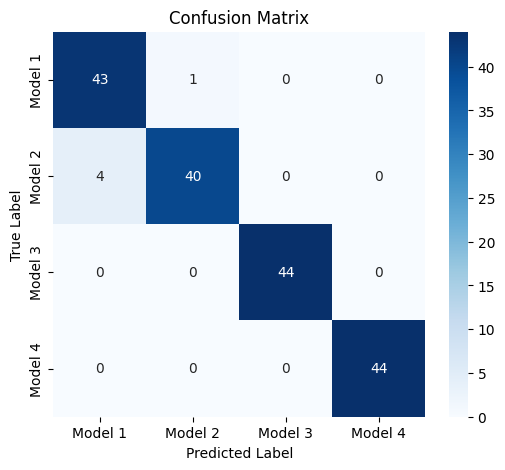

In [ ]:
# Plot training history
plt.figure(figsize=(8, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Performance table
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Get class-wise accuracy
from sklearn.metrics import classification_report
y_test_true = Y_test.values
report = classification_report(y_test_true, y_pred_classes, output_dict=True, target_names=['Model 1', 'Model 2', 'Model 3', 'Model 4'])

# Create table data
table_data = [
    ["Dataset", "Samples", "Accuracy"],
    ["Training", len(X_train), f"{final_train_acc:.4f}"],
    ["Validation", len(X_test), f"{final_val_acc:.4f}"]
]

# Print formatted table
print("\nModel Performance Summary:")
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

# Class-wise accuracy table
class_table = []
for i in range(4):
    class_table.append([
        f"Model {i+1}",
        report[f"Model {i+1}"]["precision"],
        report[f"Model {i+1}"]["recall"],
        report[f"Model {i+1}"]["f1-score"],
        report[f"Model {i+1}"]["support"]
    ])

print("\nClass-wise Performance Metrics:")
print(tabulate(class_table,
               headers=["Class", "Precision", "Recall", "F1-Score", "Samples"],
               tablefmt="grid",
               floatfmt=".4f"))

# Confusion matrix visualization

cm = confusion_matrix(y_test_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
            yticklabels=['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()